In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
sns.set(style="white",color_codes=True)

In [2]:
HouseDS=pd.read_csv("HousePS.csv")
HouseDS.head()

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Views,Area,Road,Road Width,Road Type,Amenities,Face
0,House For Sale : House For Sale In Kageshwari-...,"Khahare-Gothatar near mahantar chowk, Kageshwa...",Kathmandu,26000000.0,5,3,3.0,1,396,4 Aana,26 Feet / Blacktopped,26 Feet,Blacktopped,"['Wifi', 'Water Tank', 'Water Supply', 'Balcon...",West
1,"Office Space For Sale In Thamel, Kathmandu","Galkopakha, Thamel, Kathmandu",Kathmandu,100.0,0,0,3.0,0,400,1.8 Ropani,20 Feet,20 Feet,NaN,"['Wifi', 'Water Supply', 'Water Tank']",East
2,Chitwanma Sasto Ghaderi : Land For Sale In Chi...,"Bharatpur 14 chitwan, Chitrawan, Chitwan",Chitwan,3800000.0,0,0,2.5,0,595,20 Dhur,9 Meter / Blacktopped,9 Meter,Blacktopped,"['Wifi', 'Water Supply', 'TV Cable']",East
3,"Business For Sale In Kupondole, Lalitpur","Kupondole, Kupondole, Lalitpur",Lalitpur,700000.0,0,0,2.0,0,244,600 Sq. Feet,15 Feet / Blacktopped,15 Feet,Blacktopped,"['Wifi', 'Water Supply', 'Modular Kitchen']",West
4,"House For Sale In Chakupat, Lalitpur","dathulan road house, Chakupat, Lalitpur",Lalitpur,8700000.0,0,2,3.0,0,555,1 Aana,1 Feet / Concrete,1 Feet,Concrete,"['Wifi', 'TV Cable', 'Store Room']",East


In [3]:
HouseDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2211 non-null   object 
 1   Address     2211 non-null   object 
 2   City        2211 non-null   object 
 3   Price       2211 non-null   float64
 4   Bedroom     2211 non-null   int64  
 5   Bathroom    2211 non-null   int64  
 6   Floors      2211 non-null   float64
 7   Parking     2211 non-null   int64  
 8   Views       2211 non-null   int64  
 9   Area        2211 non-null   object 
 10  Road        2211 non-null   object 
 11  Road Width  2211 non-null   object 
 12  Road Type   1426 non-null   object 
 13  Amenities   2211 non-null   object 
 14  Face        2211 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 259.2+ KB


In [4]:
def parse_road_width(x):
    qty,measure=x.split(' ')[0],x.split(' ')[1]
    if measure =='Feet':
        return float(qty)*0.3048
    return float(qty)
HouseDS['road_width_meters']=HouseDS['Road Width'].astype('str').apply(parse_road_width)
del HouseDS['Road Width']
del HouseDS['Views']
del HouseDS['Title']

In [5]:
#LabelEncoding to convert String value to Numeric value
le = LabelEncoder()
HouseDS['City'] = le.fit_transform(HouseDS['City'])
HouseDS['Address'] = le.fit_transform(HouseDS['Address'])
HouseDS['Road Type'] = le.fit_transform(HouseDS['Road Type'])
HouseDS.head()

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Area,Road,Road Type,Amenities,Face,road_width_meters
0,631,17,26000000.0,5,3,3.0,1,4 Aana,26 Feet / Blacktopped,1,"['Wifi', 'Water Tank', 'Water Supply', 'Balcon...",West,7.9248
1,423,17,100.0,0,0,3.0,0,1.8 Ropani,20 Feet,6,"['Wifi', 'Water Supply', 'Water Tank']",East,6.0960
2,138,7,3800000.0,0,0,2.5,0,20 Dhur,9 Meter / Blacktopped,1,"['Wifi', 'Water Supply', 'TV Cable']",East,9.0000
3,663,20,700000.0,0,0,2.0,0,600 Sq. Feet,15 Feet / Blacktopped,1,"['Wifi', 'Water Supply', 'Modular Kitchen']",West,4.5720
4,1455,20,8700000.0,0,2,3.0,0,1 Aana,1 Feet / Concrete,2,"['Wifi', 'TV Cable', 'Store Room']",East,0.3048


In [6]:
# Define the list of amenities
amenities_list =['Parking','Wifi','Drainage','Water Supply','Internet', 'CCTV', 'Electricity Backup', 'Garden','Balcony']
house_face_list=['East', 'South', 'South East', 'West', 'South West', 'North','North East', 'North West']

In [7]:
# Create binary columns for each amenity
for amenity in amenities_list:
    HouseDS[amenity] = HouseDS['Amenities'].apply(lambda x: 1 if amenity in x else 0)
for face in house_face_list:
    HouseDS[face] = HouseDS['Face'].apply(lambda x: 1 if face in x else 0)        

In [8]:
#Sorting value of price in Descending order,Higher Price appears first 
HouseDS=HouseDS.sort_values(by=['Price'],ascending=False)

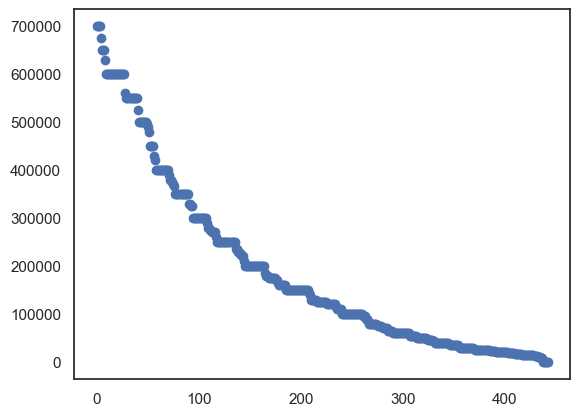

In [9]:
#Scatter plot with excluding top 20% price
exclude_top=int(0.8*len(HouseDS.Price))
plt.scatter(np.arange(0,len(HouseDS.Price[exclude_top:])),HouseDS.Price[exclude_top:])

In [10]:
#splitting Data set into Training and testing sets
X=HouseDS.drop(['Price','Area','Bathroom','Road','Amenities','Face','Water Supply'],axis=1)
y=HouseDS['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

array([[<Axes: title={'center': 'Address'}>,
        <Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'Bedroom'}>,
        <Axes: title={'center': 'Floors'}>,
        <Axes: title={'center': 'Parking'}>],
       [<Axes: title={'center': 'Road Type'}>,
        <Axes: title={'center': 'road_width_meters'}>,
        <Axes: title={'center': 'Wifi'}>,
        <Axes: title={'center': 'Drainage'}>,
        <Axes: title={'center': 'Internet'}>],
       [<Axes: title={'center': 'CCTV'}>,
        <Axes: title={'center': 'Electricity Backup'}>,
        <Axes: title={'center': 'Garden'}>,
        <Axes: title={'center': 'Balcony'}>,
        <Axes: title={'center': 'East'}>],
       [<Axes: title={'center': 'South'}>,
        <Axes: title={'center': 'South East'}>,
        <Axes: title={'center': 'West'}>,
        <Axes: title={'center': 'South West'}>,
        <Axes: title={'center': 'North'}>],
       [<Axes: title={'center': 'North East'}>,
        <Axes: title={'center': 'North

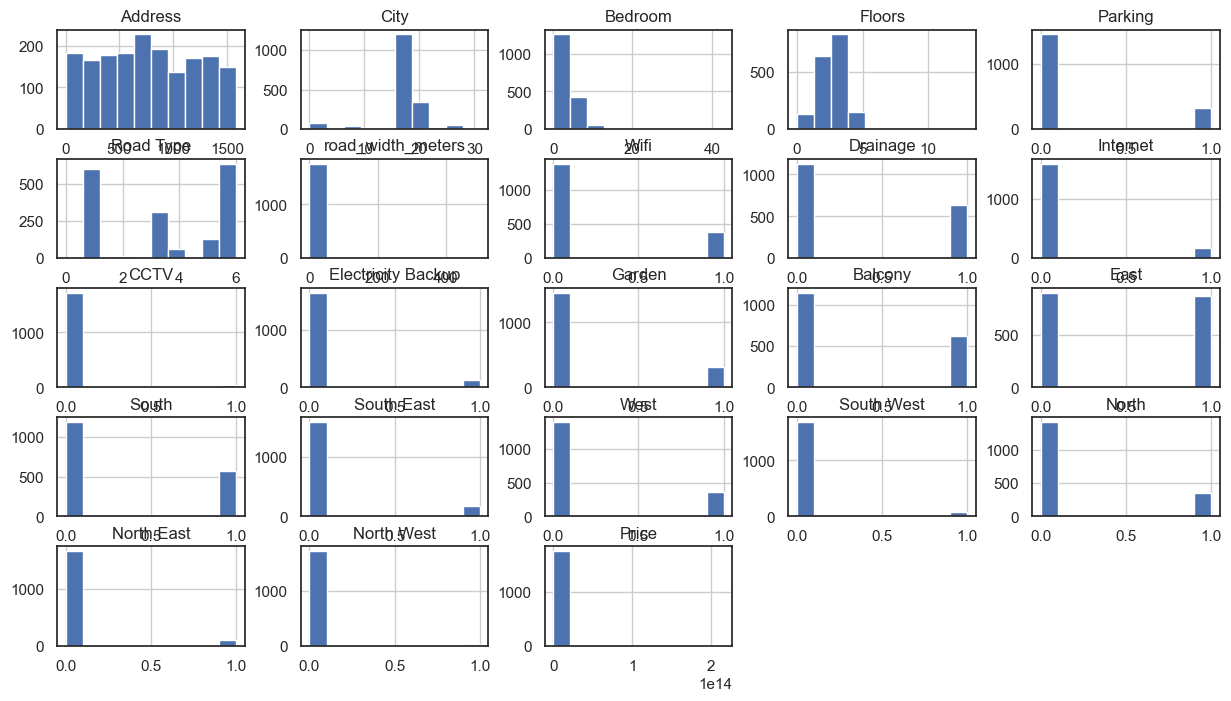

In [11]:
train_data=X_train.join(y_train)
train_data.hist(figsize=(15,8))

,Address,City,Bedroom,Floors,Parking,Road Type,road_width_meters,Wifi,Drainage,Internet,...,Balcony,East,South,South East,West,South West,North,North East,North West,Price
Address,1.000000,-0.009435,0.017289,-0.089260,0.048314,0.014654,-0.001389,-0.028685,-0.037485,-0.016470,...,-0.031775,0.012890,0.034788,0.006085,0.015977,0.042325,-0.098686,-0.060744,-0.054020,0.019881
City,-0.009435,1.000000,0.029427,0.053399,0.024939,0.069286,-0.057618,-0.004040,0.039730,-0.007353,...,0.058311,-0.012807,0.044832,0.020981,-0.004844,0.004858,-0.020527,-0.029648,0.026620,-0.059072
Bedroom,0.017289,0.029427,1.000000,0.200800,0.194516,-0.011955,-0.024592,0.253830,0.308424,0.129396,...,0.326334,0.106775,-0.048413,0.006707,-0.074298,-0.044875,0.017524,0.056813,0.017710,-0.029031
Floors,-0.089260,0.053399,0.200800,1.000000,0.025104,-0.025986,-0.000475,0.110880,0.142767,0.044641,...,0.158130,0.032308,-0.061100,-0.027404,-0.029215,-0.036711,0.040777,0.010673,0.041055,0.047682
Parking,0.048314,0.024939,0.194516,0.025104,1.000000,-0.187484,-0.022850,0.181622,0.292583,0.422746,...,0.270386,0.026692,-0.027642,-0.035798,-0.014819,0.009434,0.000980,-0.002948,0.031422,-0.023802
Road Type,0.014654,0.069286,-0.011955,-0.025986,-0.187484,1.000000,0.008326,-0.078918,-0.035301,-0.225528,...,0.017422,0.001433,0.031840,0.038410,-0.004121,0.012550,0.010578,0.019295,-0.002791,-0.002557
road_width_meters,-0.001389,-0.057618,-0.024592,-0.000475,-0.022850,0.008326,1.000000,-0.013882,-0.033031,-0.013922,...,-0.034594,0.038340,-0.008119,0.029413,-0.011182,-0.007287,0.019279,0.053999,-0.006158,-0.005871
Wifi,-0.028685,-0.004040,0.253830,0.110880,0.181622,-0.078918,-0.013882,1.000000,0.533942,0.414380,...,0.568766,0.065224,-0.049874,-0.007727,-0.019869,0.016192,0.006764,0.008263,0.007341,-0.026606
Drainage,-0.037485,0.039730,0.308424,0.142767,0.292583,-0.035301,-0.033031,0.533942,1.000000,0.319281,...,0.654464,0.109882,-0.093478,-0.024147,-0.067444,-0.047864,0.031121,0.036352,0.040748,-0.038291
Internet,-0.016470,-0.007353,0.129396,0.044641,0.422746,-0.225528,-0.013922,0.414380,0.319281,1.000000,...,0.320172,-0.020775,-0.014979,-0.058531,-0.002806,0.001909,-0.001707,-0.006444,-0.003241,-0.016533


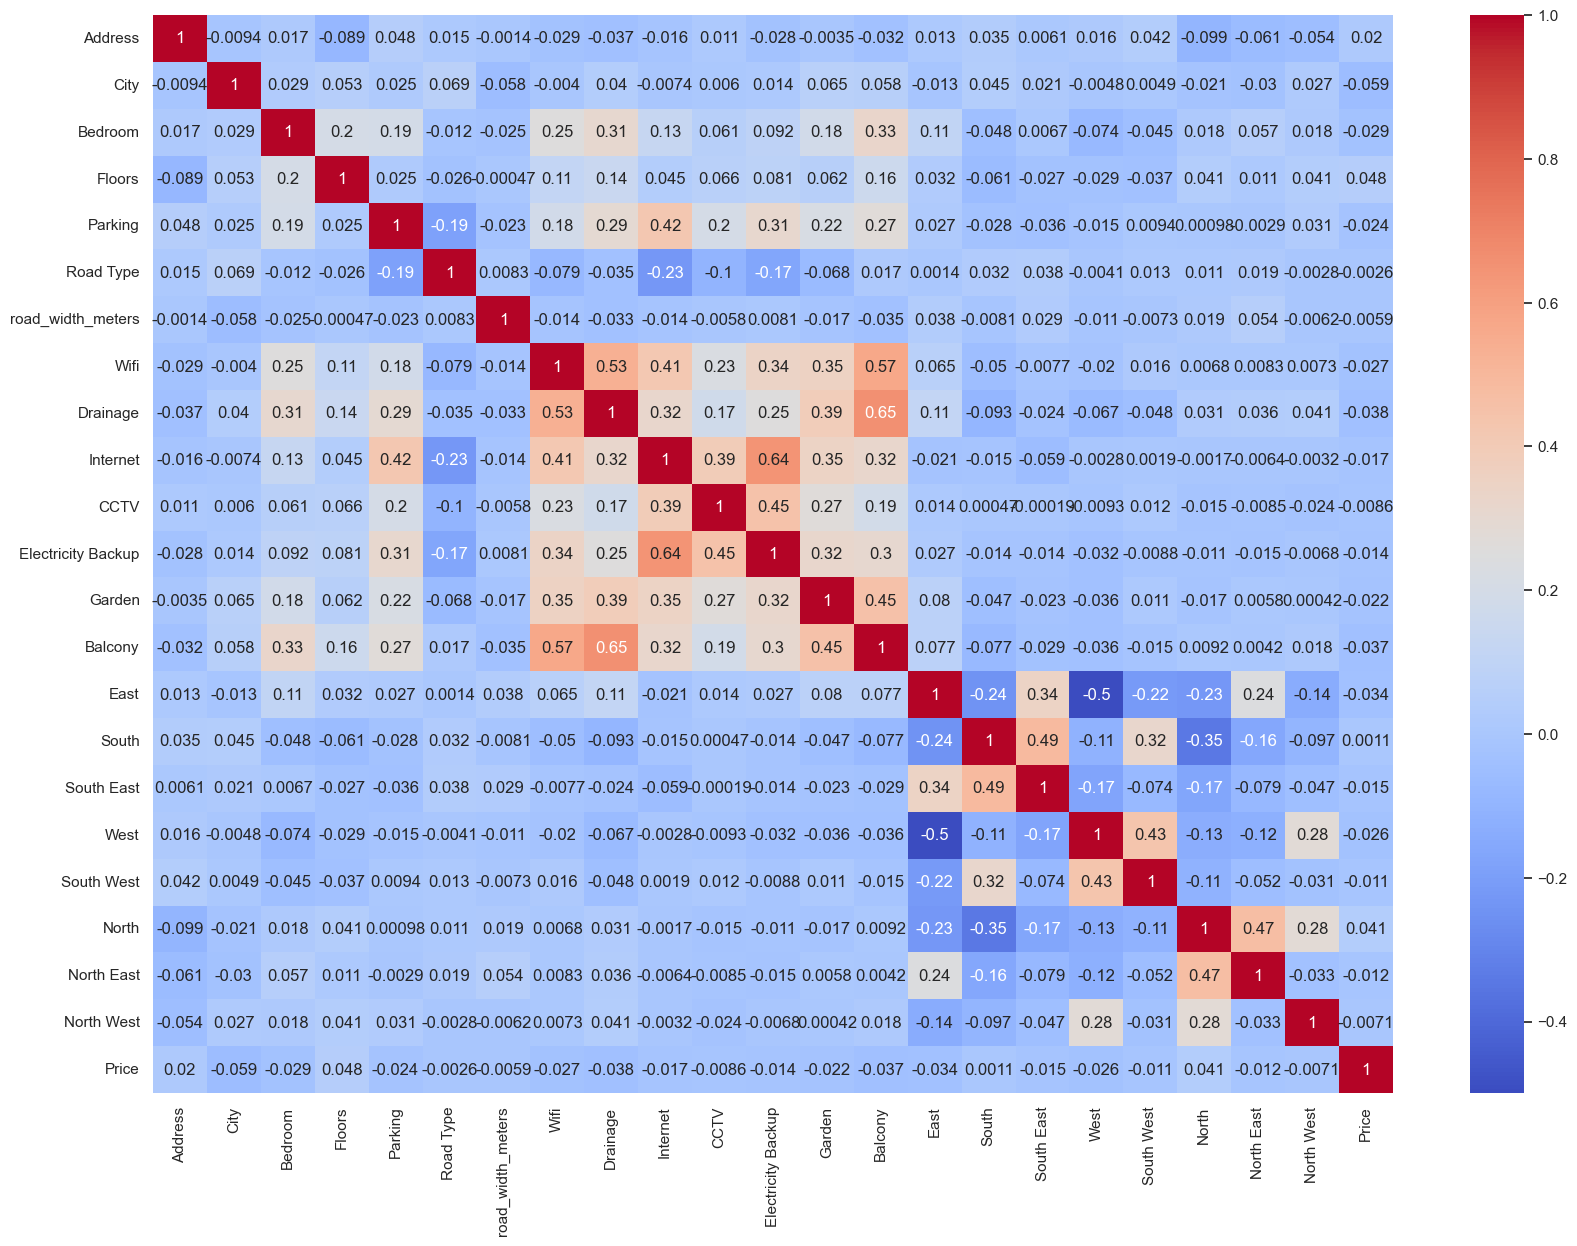

In [12]:
#correlations of Data
plt.figure(figsize=(20, 14))
sns.heatmap(train_data.corr(),annot=True,cmap="coolwarm")
train_data.corr()

In [13]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1768, 22) (443, 22) (1768,) (443,)


In [14]:
#feature scaling(to normalize feature variables)
#np.random.seed(42)with_mean=False
scaler = StandardScaler()
#X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2,random_state=1)
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [15]:
svm_model=SVR(kernel='linear')

In [16]:
#Training the model
svm_model.fit(X_train_scale,y_train)

SVR(kernel='linear')

In [17]:
#Making predictions on test set
pred_price=svm_model.predict(X_test_scale)
#print("Your Predicted Price is ",pred_price)

In [18]:
#Evaluating the model
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,pred_price)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_price)

In [19]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 5.188269276503288e+25
Root Mean Squared Error (RMSE): 7202964165191.5
R-squared (R2): -0.00427525062823042


In [20]:
'''new_house=[[1286,17,5,6,3,5,5,3.6576]]
new_house_scale=scaler.transform(new_house)
pred_price=svm_model.predict(new_house)
print("Your Predicted Price is ",pred_price)'''

'new_house=[[1286,17,5,6,3,5,5,3.6576]]\nnew_house_scale=scaler.transform(new_house)\npred_price=svm_model.predict(new_house)\nprint("Your Predicted Price is ",pred_price)'

In [21]:
#data->(Bedroom,Bathroom,Floors,ParkingSpace,Views(Visually Attractive),City,Address)
'''def House_requirement():
    No_of_Bedroom=int(input("Enter Number of bedrooms: "))
    No_of_Bathroom=int(input("Enter Number of bathrooms: "))
    No_of_Floors=float(input("Enter Number of floors: "))
    No_of_Parking=int(input("Enter Number of Parking Space: "))
    #Address=input("Enter the address of house: ")
    #City=input("Enter the City of house located: ")
    new_house=[[No_of_Bedroom,No_of_Bathroom,No_of_Floors,No_of_Parking]]
    new_house_scale=scaler.transform(new_house)
    pred_price=svm_model.predict(new_house_scale)
    print("Your Predicted Price is ",pred_price)
House_requirement() '''

'def House_requirement():\n    No_of_Bedroom=int(input("Enter Number of bedrooms: "))\n    No_of_Bathroom=int(input("Enter Number of bathrooms: "))\n    No_of_Floors=float(input("Enter Number of floors: "))\n    No_of_Parking=int(input("Enter Number of Parking Space: "))\n    #Address=input("Enter the address of house: ")\n    #City=input("Enter the City of house located: ")\n    new_house=[[No_of_Bedroom,No_of_Bathroom,No_of_Floors,No_of_Parking]]\n    new_house_scale=scaler.transform(new_house)\n    pred_price=svm_model.predict(new_house_scale)\n    print("Your Predicted Price is ",pred_price)\nHouse_requirement() '

In [22]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Create a Random Forest Regressor and Train the model using the training sets 
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
#Prediction on train Data
y_pred = rf.predict(X_train)
y_pred

array([3.89535024e+07, 1.18066800e+07, 1.00800051e+13, ...,
       7.13800000e+06, 2.83850000e+07, 7.12337526e+07])

In [25]:
# Model Evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7970014277045089
Adjusted R^2: 0.7944421333833049
MAE: 355446844248.4321
MSE: 1.1899234631842424e+25
RMSE: 3449526725775.932


In [26]:
'''new_house=[[100,5,6,6,3,6,5,6.5]]
new_house_scale=scaler.transform(new_house)
pred_price=rf.predict(new_house)
print("Your Predicted Price is ",pred_price)'''

'new_house=[[100,5,6,6,3,6,5,6.5]]\nnew_house_scale=scaler.transform(new_house)\npred_price=rf.predict(new_house)\nprint("Your Predicted Price is ",pred_price)'

In [27]:
HouseDS.describe()

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Road Type,road_width_meters,Wifi,...,Garden,Balcony,East,South,South East,West,South West,North,North East,North West
count,2211.000000,2211.000000,2.211000e+03,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,...,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,774.190864,17.160561,4.065559e+11,3.033921,2.227047,2.679941,0.178652,3.556762,5.555273,0.215287,...,0.177295,0.350972,0.490728,0.315694,0.099050,0.204885,0.044324,0.206242,0.054726,0.019448
std,447.623005,4.151105,7.566414e+12,4.009855,2.598992,1.025188,0.383147,2.146409,17.294831,0.411114,...,0.382005,0.477382,0.500027,0.464897,0.298797,0.403709,0.205860,0.404697,0.227497,0.138125
min,0.000000,0.000000,9.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,399.500000,17.000000,1.300000e+06,0.000000,0.000000,2.000000,0.000000,1.000000,3.962400,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,781.000000,17.000000,8.000000e+06,3.000000,2.000000,3.000000,0.000000,3.000000,4.572000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1166.500000,18.000000,2.650000e+07,5.000000,4.000000,3.000000,0.000000,6.000000,6.096000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1587.000000,31.000000,2.160000e+14,95.000000,40.000000,13.000000,1.000000,6.000000,500.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
